In [1]:
import lightkurve as lk
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
import FAOV
from lightkurve.correctors import CBVCorrector

In [2]:
ra,dec=93.970917,-61.94675
coord=SkyCoord(ra=ra*u.deg,dec=dec*u.deg)
search_result = lk.search_lightcurve(coord,author="GSFC-ELEANOR-LITE")
print(search_result)

SearchResult containing 6 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 01 2018 GSFC-ELEANOR-LITE    1800   150190122      0.0
  1 TESS Sector 02 2018 GSFC-ELEANOR-LITE    1800   150190122      0.0
  2 TESS Sector 03 2018 GSFC-ELEANOR-LITE    1800   150190122      0.0
  3 TESS Sector 04 2018 GSFC-ELEANOR-LITE    1800   150190122      0.0
  4 TESS Sector 05 2018 GSFC-ELEANOR-LITE    1800   150190122      0.0
  5 TESS Sector 06 2018 GSFC-ELEANOR-LITE    1800   150190122      0.0


In [11]:
#data=search_result[0].download()
data=search_result[0].download_all().stitch()

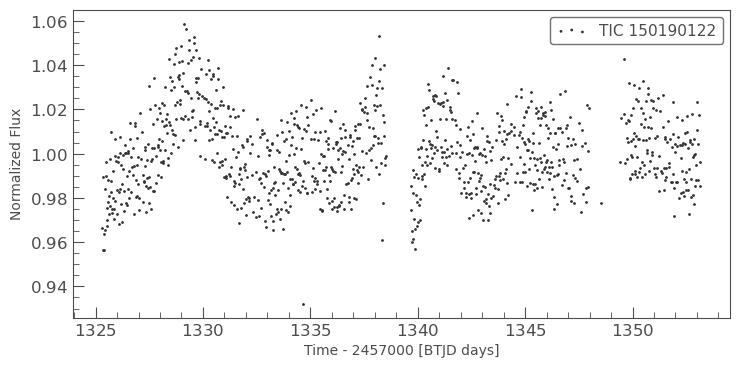

In [12]:
#data.remove_outliers().remove_nans()[:len(data)//4].plot()
#data=CBVCorrector(data)
data.remove_outliers().remove_nans().scatter()
plt.show()

In [13]:
pg = data.to_periodogram()
#pg=data.remove_outliers().remove_nans()[:len(data)//4].to_periodogram()

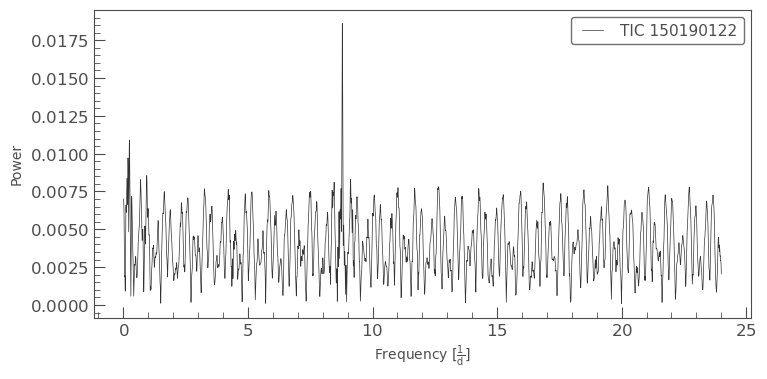

In [14]:
pg.plot();
plt.show()

In [15]:
val=pg.period_at_max_power.value*2
print(val)

0.22758313255867813


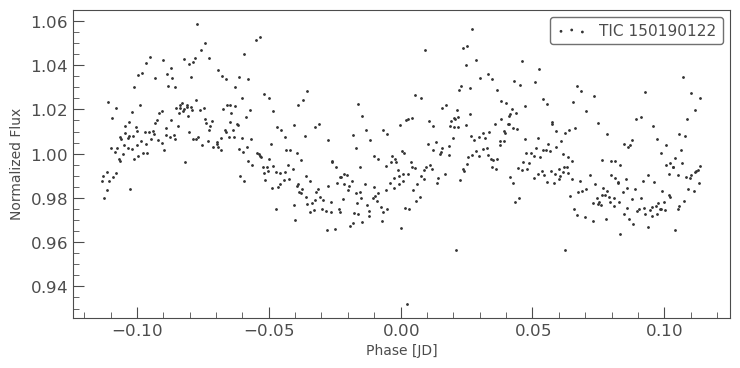

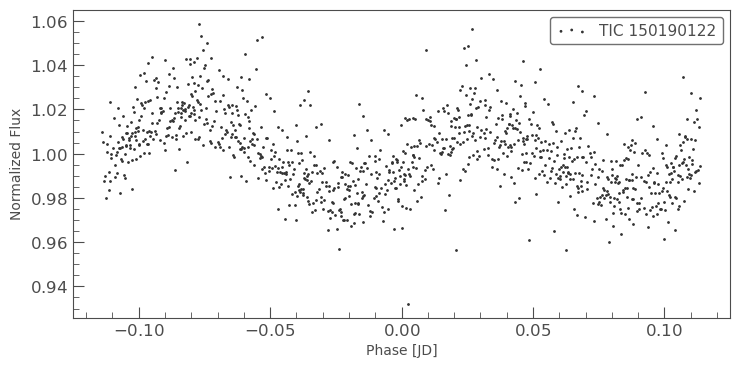

In [16]:
data.remove_outliers().remove_nans()[:len(data)//2+20].fold(val).scatter()
data.remove_outliers().remove_nans().fold(val).scatter()
plt.show()

In [17]:
val

0.22758313255867813

In [10]:
1/val

0.05483591208304503